In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) #this works to conect the drive to the script itself being then able to acess files such as the data.zip

Mounted at /content/drive


Extração dos ficheiros zip

In [2]:
!unzip /content/drive/MyDrive/TESE/RioFatSegm.zip

Archive:  /content/drive/MyDrive/TESE/RioFatSegm.zip
  inflating: RioFatSegm/2016Rodrigues.pdf  
   creating: RioFatSegm/Dicom _ Treino/
   creating: RioFatSegm/Dicom _ Treino/ACel/
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0001_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0002_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0003_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0004_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0005_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0006_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0007_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0008_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0009_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0010_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0011_an.dcm  
  inflating: RioFatSegm/Dicom _ Treino/ACel/IM-0003-0012_an.dcm  
  inflating: RioFatSegm/Di

In [3]:
import glob
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from PIL import Image, ImageDraw
# example of converting an image with the Keras API
# example of saving an image with the Keras API
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

FUNÇÃO PARA EXTRAÇÃO DE MASCARAS

In [ ]:
def convert_mask(img):
 mascara_azul=np.zeros((512,512))
 #mascara_verde=np.zeros((512,512))
#Y_fat_range[0]
#plt.imshow(Y_fat_range[0])
 for i in range(len(img[0,:,2])):
    for l in range(len(img[:,0,2])):
        if img[l,i,0]==0 and img[l,i,1]==0 and img[l,i,2]>0:
            mascara_azul[l,i]=1
        #if img[l,i,0]==0 and img[l,i,1]>0 and img[l,i,2]==0:
            #mascara_verde[l,i]=1
 return mascara_azul                #,mascara_verde           

FUNÇÃO PARA CONVERTER EM FORMA CONVEXA O PERICARDIO

In [ ]:
def convex_hull_image(data):
    region = np.argwhere(data)
    hull = ConvexHull(region)
    verts = [(region[v,0], region[v,1]) for v in hull.vertices]
    img = Image.new('L', data.shape, 0)
    ImageDraw.Draw(img).polygon(verts, outline=1, fill=1)
    mask = np.array(img)
    
    return mask.T

VÁRIOS TIPOS DE RECORTES

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import cv2
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import smart_resize as resize

IMG_HEIGHT=512
IMG_WIDTH=512

def recorte(img,IMG_HEIGHT,IMG_WIDTH):
  colunas_cortar=[]
  linhas_cortar=[]
  for c in range(img.shape[1]):
    if np.sum(img[:,c])==0:
      colunas_cortar.append(c)
  for l in range(img.shape[0]):
    if np.sum(img[l,:])==0:
      linhas_cortar.append(l)

  img_c=np.delete(img,colunas_cortar,axis=1) 
  img_c=np.delete(img_c,linhas_cortar,axis=0) 
  img_c=cv2.resize(img_c, (IMG_HEIGHT, IMG_WIDTH))
  return img_c



In [ ]:
def recorte_esq(img,IMG_HEIGHT,IMG_WIDTH):
  colunas_cortar=[]
  linhas_cortar=[]
  for c in range(int((img.shape[1])/2)):
    if np.sum(img[:,c])==0:
      colunas_cortar.append(c)
  
  img_c=np.delete(img,colunas_cortar,axis=1) 
  img_c=cv2.resize(img_c, (IMG_HEIGHT, IMG_WIDTH))
  return img_c
 

In [ ]:
def recorte_esq_baixo(img,IMG_HEIGHT,IMG_WIDTH):
  colunas_cortar=[]
  linhas_cortar=[]
  for c in range(int(img.shape[1]/2)):
    if np.sum(img[:,c])==0:
      colunas_cortar.append(c)
  for l in range(int(img.shape[0]/2),img.shape[0]):
    if np.sum(img[l,:])==0:
      linhas_cortar.append(l)

  img_c=np.delete(img,colunas_cortar,axis=1) 
  img_c=np.delete(img_c,linhas_cortar,axis=0) 
  img_c=cv2.resize(img_c, (IMG_HEIGHT, IMG_WIDTH))
  return img_c

In [ ]:
def recorte_cim_esq(img,IMG_HEIGHT,IMG_WIDTH):
  colunas_cortar=[]
  linhas_cortar=[]
  for c in range(int(img.shape[1]/2)):
    if np.sum(img[:,c])==0:
      colunas_cortar.append(c)
  for l in range(int(img.shape[0]/2)):
    if np.sum(img[l,:])==0:
      linhas_cortar.append(l)

  img_c=np.delete(img,colunas_cortar,axis=1) 
  img_c=np.delete(img_c,linhas_cortar,axis=0) 
  img_c=cv2.resize(img_c, (IMG_HEIGHT, IMG_WIDTH))
  return img_c

In [ ]:
def recorte_baixo(img,IMG_HEIGHT,IMG_WIDTH):
  colunas_cortar=[]
  linhas_cortar=[]
  for l in range(int(img.shape[0]/2),img.shape[0]):
    if np.sum(img[l,:])==0:
      linhas_cortar.append(l)

  img_c=np.delete(img,colunas_cortar,axis=1) 
  img_c=np.delete(img_c,linhas_cortar,axis=0) 
  img_c=cv2.resize(img_c, (IMG_HEIGHT, IMG_WIDTH))
  return img_c

In [ ]:
def recorte_baixo_esq_dir(img,IMG_HEIGHT,IMG_WIDTH):
  colunas_cortar=[]
  linhas_cortar=[]
  for c in range(img.shape[1]):
    if np.sum(img[:,c])==0:
      colunas_cortar.append(c)
  for l in range(int(img.shape[0]/2),img.shape[0]):
    if np.sum(img[l,:])==0:
      linhas_cortar.append(l)

  img_c=np.delete(img,colunas_cortar,axis=1) 
  img_c=np.delete(img_c,linhas_cortar,axis=0) 
  img_c=cv2.resize(img_c, (IMG_HEIGHT, IMG_WIDTH))
  return img_c

Check paciente e fazer recorte de acordo com o paciente

In [ ]:
def recorte_by_patient(img,patient):        
        if patient=='ACel':
          imagem=recorte_esq(img,IMG_HEIGHT,IMG_WIDTH)
          epicardio_mask=convert_mask(imagem)
        elif patient=='AEdu' or patient=='AFre':  
          imagem=recorte_esq_baixo(img,IMG_HEIGHT,IMG_WIDTH)
          epicardio_mask=convert_mask(imagem)
        elif patient=='CFer' or patient=='CLis':
          imagem=recorte_cim_esq(img,IMG_HEIGHT,IMG_WIDTH)
          epicardio_mask=convert_mask(imagem)
        elif patient=='DSil' or patient=='ISou' or patient=='MPai' or patient=='VMar':
          imagem=recorte(img,IMG_HEIGHT,IMG_WIDTH)
          epicardio_mask=convert_mask(imagem)
        elif patient=='EGra':
          imagem=recorte_baixo(img,IMG_HEIGHT,IMG_WIDTH)
          epicardio_mask=convert_mask(imagem)
        elif patient=='FGas' or patient=='TJes':
          imagem=recorte_baixo_esq_dir(img,IMG_HEIGHT,IMG_WIDTH)
          epicardio_mask=convert_mask(imagem)  
        else:
          epicardio_mask=np.array([0])
          imagem=np.array([0])
        return epicardio_mask,imagem        

Install Dicom

In [8]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 12.2 MB/s 


Mudar range HU e normalização

In [5]:
def min_max_norm(x):
  y = (x -np.min(x)) / (np.max(x) - np.min(x))
  return y

In [28]:
def convert_hu(dicom,min,max):
  dicom_hu = dicom.pixel_array * dicom.RescaleSlope + dicom.RescaleIntercept
  clipped_hu=np.zeros((512,512))
  #clipped_hu = np.clip(dicom_hu, min,max)
  for i in range(len(dicom_hu[0,:])):
    for l in range(len(dicom_hu[:,0])):
        if dicom_hu[l,i]>max or dicom_hu[l,i]<min :
            clipped_hu[l,i]=min
        else:
            clipped_hu[l,i]=dicom_hu[l,i]
  return clipped_hu


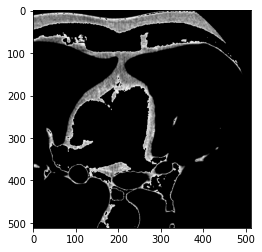

In [32]:
import pydicom 
path='/content/RioFatSegm/Dicom _ Treino/ACel/IM-0003-0001_an.dcm'

from sklearn import preprocessing
dicom = pydicom.dcmread(path)
clipped_hu=convert_hu(dicom,-200,-30)
y = min_max_norm(clipped_hu)
dicom_img_path="/content/drive/MyDrive/TESE/RioFat/New/Peri_conv/images"
os.chdir(dicom_img_path) 
img_dicom= img_to_array(y)
save_img('teste_dicom.png', img_dicom)  

plt.imshow(y,cmap='gray')


Organizão e correspondência das FAT_IMAGES às respetivas máscaras (epicardio/pericardium) e às imagens DICOM

In [ ]:
X_train_fat=[]
Y_new=[]
epi_mask=[]
medi_mask=[]
convex_mask=[]
X_dicom=[]

IMG_HEIGHT=512
IMG_WIDTH=512

#path_convex=[]
#path_fat=[]

#name_fat=[]
#num=[]
#path=[]


Y_new_PATH ='/content/RioFatSegm/Ground Truth - Fat Range/'
FAT_PATH ='/content/RioFatSegm/Fat Images/'
TRAIN_PATH ='/content/RioFatSegm/Dicom _ Treino/'

fat_tr=sorted(os.listdir(FAT_PATH))

for patient in fat_tr:
    n=0
    files=sorted(glob.glob(Y_new_PATH+patient+'/*.bmp'))
    
    for file in files:
        n=n+1
        #num.append(n)
        img =cv2.imread(file)
        Y_new.append(list(img))
        #name_fat.append(patient)
        #path.append(file)
        
        #print(len(Y_new),file)
        
        imagem=np.array(list(img))
        epicardio_mask,nada=recorte_by_patient(imagem,patient)
                
        if epicardio_mask.any() ==1:
            peri_convex_mask=convex_hull_image(epicardio_mask)
            convex_mask.append(list(peri_convex_mask))
            #path_convex.append(file)
            epi_mask.append(list(epicardio_mask))

            # save the image epicardio mask
            #img_epi = img_to_array(epicardio_mask)
            #epi_mask_path="/content/drive/MyDrive/TESE/RioFat/New/Epicardio/mask"
            #os.chdir(epi_mask_path)
            #save_img(str(patient)+'_'+str(n)+'_epi.png', img_epi)
            print(file)
            # save the image convex mask
            #img_conv = img_to_array(peri_convex_mask)
            #peri_mask_path="/content/drive/MyDrive/TESE/RioFat/New/Peri_conv/mask"
            #os.chdir(peri_mask_path)
            #save_img(str(patient)+'_'+str(n)+'_conv.png', img_conv)
            #print(len(epi_mask),file)
            
    files2=sorted(glob.glob(FAT_PATH+patient+'/*.BMP'))
    n=0
    for file2 in files2:
      n=n+1  
      if len(X_train_fat)<len(convex_mask):  # para convexa , senão mudar para Y_new
        img =cv2.imread(file2)
        nada,img=recorte_by_patient(img,patient)
        X_train_fat.append(list(img))
        #path_fat.append(file2)
        print(file2)
        # save the fat image 
        #epi_img_path="/content/drive/MyDrive/TESE/RioFat/New/Epicardio/images"
        #os.chdir(epi_img_path) 
        #img_fat = img_to_array(img)
        #save_img(str(patient)+'_'+str(n)+'_fat.png', img_fat)

    files3=sorted(glob.glob(TRAIN_PATH+patient+'/*.dcm'))
    n=0
    for file3 in files3 :
      n=n+1
      if len(X_dicom)<len(convex_mask):
        ds = dicom.dcmread(file3)
        img = ds.pixel_array
        #img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH)) 
        X_dicom.append(list(img))
        # save the  dicom image 
        #dicom_img_path="/content/drive/MyDrive/TESE/RioFat/New/Peri_conv/images"
        #os.chdir(dicom_img_path) 
        #img_dicom= img_to_array(img)
        #save_img(str(patient)+'_'+str(n)+'_dicom.jpg', img_dicom)  
        print(len(X_dicom),file3) 
        

/content/RioFatSegm/Ground Truth - Fat Range/ACel/001.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/002.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/003.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/004.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/005.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/006.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/007.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/008.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/009.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/010.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/011.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/012.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/013.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/014.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/015.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/016.bmp
/content/RioFatSegm/Ground Truth - Fat Range/ACel/017.bmp
/content/RioFa

Converter as imagens para array

In [ ]:
X_train_fat=np.array(X_train_fat)
Y_new=np.array(Y_new)
epi_mask=np.array(epi_mask)
#medi_mask=np.array(medi_mask)
convex_mask=np.array(convex_mask)
X_dicom=np.array(X_dicom)



Check se os shapes coincidem 

In [ ]:
X_train_fat.shape[0]==epi_mask.shape[0]==convex_mask.shape[0]==X_dicom.shape[0]

True

In [ ]:
X_train_fat.shape

(453, 512, 512, 3)

In [ ]:
X_dicom.shape

(453, 512, 512)

GUARDAR COMO ARRAY PARA NÃO FAZER TUDO NOVAMENTE

In [ ]:
from numpy import asarray
from numpy import save

array_path="/content/drive/MyDrive/TESE/RioFat/New/arrays"
os.chdir(array_path) 
#save('convex_mask_new.npy', convex_mask)

In [ ]:
#save('fat_images_fcon_new.npy', X_train_fat)

In [ ]:
#save('epi_mask_fat_new.npy', epi_mask)

In [ ]:
#save('dicom_images_new.npy', X_dicom)

lOAD IMAGENS ANTIGAS

In [ ]:
# load numpy array from npy file
import os

from numpy import load
array_path="/content/drive/MyDrive/TESE/RioFat/arrays"
os.chdir(array_path) 

mascaras_epi=load('epi_mask_fat.npy')
mascaras_peri=load('convex_mask.npy')
fat_images=load('fat_images_fcon.npy')
dicom_images=load('dicom_images.npy')

In [ ]:
mascaras_epi.shape

(757, 512, 512)

In [ ]:
fat_images.shape

(757, 512, 512, 3)

LOAD IMAGENS NOVAS

In [ ]:
array_path="/content/drive/MyDrive/TESE/RioFat/New/arrays"
os.chdir(array_path) 

mascaras_epi_n=load('epi_mask_fat_new.npy')
mascaras_peri_n=load('convex_mask_new.npy')
fat_images_n=load('fat_images_fcon_new.npy')
dicom_images_n=load('dicom_images_new.npy')

In [ ]:
mascaras_epi_n.shape

In [ ]:
fat_images_n.shape

Mostrar exemplo 620

Text(0.5, 1.0, 'DICOM')

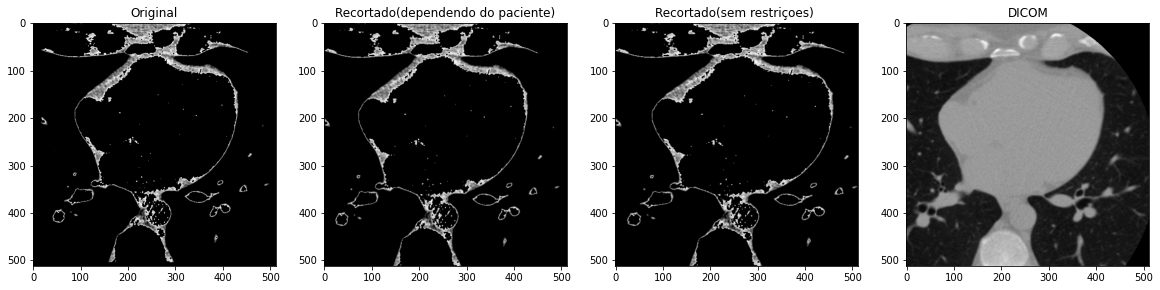

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(fat_images[50],cmap='gray')
plt.title('Original')
plt.subplot(1,4,2)
plt.imshow(fat_images_n[50],cmap='gray')
plt.title('Recortado(dependendo do paciente)')
plt.subplot(1,4,3)
plt.imshow(recorte(fat_images[50],512,512),cmap='gray')
plt.title('Recortado(sem restriçoes) ')
#plt.subplot(1,5,4)
#plt.imshow(mascaras_peri_n[50],cmap='gray')
#plt.title('Recortado(dependendo do paciente)')
plt.subplot(1,4,4)
plt.imshow(dicom_images_n[50],cmap='gray')
plt.title('DICOM')

Text(0.5, 1.0, 'Dicom image')

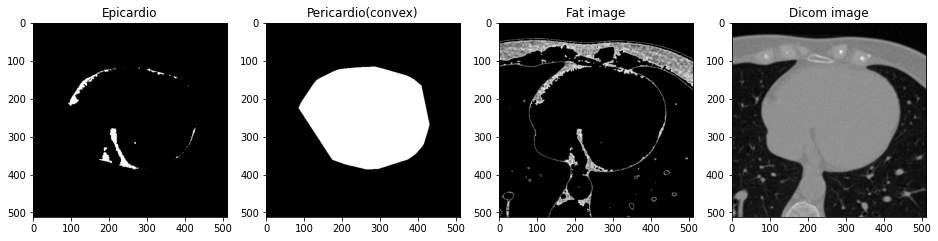

In [ ]:
plt.figure(figsize=(16,16))
plt.subplot(1,4,1)
plt.imshow(mascaras_epi_n[400],cmap='gray')

plt.title('Epicardio')
plt.subplot(1,4,2)
plt.imshow(mascaras_peri_n[400],cmap='gray')

plt.title('Pericardio(convex)')
plt.subplot(1,4,3)
plt.imshow(fat_images_n[400])

plt.title('Fat image')
plt.subplot(1,4,4)
plt.imshow(dicom_images_n[400],cmap='gray')

plt.title('Dicom image')

MUDAR HU DAS IMAGENS DICOM E FAZER CLIPPING

In [ ]:
def min_max_norm(x):
  y = (x -np.min(x)) / (np.max(x) - np.min(x))
  return y

In [ ]:
path='/content/RioFatSegm/Dicom _ Treino/ACel/IM-0003-0001_an.dcm'
import pydicom
from sklearn import preprocessing
dicom = pydicom.dcmread(path)
dicom_hu = dicom.pixel_array * dicom.RescaleSlope + dicom.RescaleIntercept
clipped_hu = np.clip(dicom_hu, -125,225)

y = min_max_norm(clipped_hu)
plt.imshow(y ,cmap='gray')



ModuleNotFoundError: ignored